# 1- Introduction

 blah blah
 
### Problem Definition
 
 grigri
 
 ### Problem Solution
 lorem ipsum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import folium

In [2]:
! ls -lrt

total 884
-rw-r--r-- 1 rafael rafael  25879 dez  2  2020  lisbon-houses.csv
-rw-r--r-- 1 rafael rafael    337 nov  1 18:29  README.md
-rw-r--r-- 1 rafael rafael     41 nov 24 21:12  token.txt
-rw-r--r-- 1 rafael rafael 864350 dez  2 22:09 'Project - Lisbon House Prices.ipynb'


In [3]:
df_raw= pd.read_csv('lisbon-houses.csv')

In [4]:
df_raw.dtypes

Id                   int64
Condition           object
PropertyType        object
PropertySubType     object
Bedrooms             int64
Bathrooms            int64
AreaNet              int64
AreaGross            int64
Parking              int64
Latitude           float64
Longitude          float64
Country             object
District            object
Municipality        object
Parish              object
Price M2             int64
Price                int64
dtype: object

In [5]:
df = df_raw.convert_dtypes()
df.dtypes

Id                   Int64
Condition           string
PropertyType        string
PropertySubType     string
Bedrooms             Int64
Bathrooms            Int64
AreaNet              Int64
AreaGross            Int64
Parking              Int64
Latitude           Float64
Longitude          Float64
Country             string
District            string
Municipality        string
Parish              string
Price M2             Int64
Price                Int64
dtype: object

In [6]:
numerical_feats = df.dtypes[df.dtypes != "string"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "string"].index
print("Number of Categorical features: ", len(categorical_feats))



Number of Numerical features:  10
Number of Categorical features:  7


In [7]:
df

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.164,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,For Refurbishment,Homes,Apartment,2,1,66,132,0,38.746,-9.1769,Portugal,Lisboa,Lisboa,Benfica,2727,196500
242,347,For Refurbishment,Homes,Apartment,3,1,75,150,0,38.7177,-9.1341,Portugal,Lisboa,Lisboa,Santa Maria Maior,4807,245000
243,348,For Refurbishment,Single Habitation,Townhouse Dwelling,2,1,90,180,0,38.7694,-9.1138,Portugal,Lisboa,Lisboa,Olivais,2463,486000
244,349,For Refurbishment,Single Habitation,Dwelling,4,3,121,242,0,38.703,-9.2044,Portugal,Lisboa,Lisboa,Belem,3542,375000


Our dataset has a total of 17 columns and each column has 246 observations.

Columns:

  * **Id**: is a unique identifying number assigned to each house.
  * **Condition**: The house condition (i.e., New, Used, As New, For Refurbishment).
  * **PropertyType**: Property type (i.e., Home, Single habitation)
  * **PropertySubType**: Property Sub Type (i.e., Apartment, duplex, etc.)
  * **Bedrooms**: Number of Bedrooms
  * **Bathrooms**: Number of Bathrooms
  * **AreaNet**:Net area of the house
  * **AreaGross**: Gross area of the house
  * **Parking**: Number of parking places
  * **Latitude**: Geographical Latitude
  * **Longitude**: Geographical Longitude
  * **Country**: Country where the house is located
  * **District**: District where the house is located
  * **Municipality**: Municipality where the house is located
  * **Parish**: Parish where the house is located
  * **Price M2**: Price per m² in the location of the house
  * **Price**: This is our training variable and target. It is the home price



In [8]:
df.columns

Index(['Id', 'Condition', 'PropertyType', 'PropertySubType', 'Bedrooms',
       'Bathrooms', 'AreaNet', 'AreaGross', 'Parking', 'Latitude', 'Longitude',
       'Country', 'District', 'Municipality', 'Parish', 'Price M2', 'Price'],
      dtype='object')

In [9]:
df = df.drop(['Country', 'District','Municipality'], axis=1)

In [10]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,246.0,NaN,NaN,NaN,226.670732,72.308419,101.0,166.25,227.5,288.75,350.0
Condition,246,4,New,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertyType,246,2,Homes,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertySubType,246,8,Apartment,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedrooms,246.0,NaN,NaN,NaN,2.49187,1.354484,0.0,2.0,2.0,3.0,11.0
Bathrooms,246.0,NaN,NaN,NaN,1.845528,1.034369,0.0,1.0,2.0,2.0,6.0
AreaNet,246.0,NaN,NaN,NaN,109.662602,66.261664,23.0,64.25,90.0,145.0,573.0
AreaGross,246.0,NaN,NaN,NaN,219.325203,132.523328,46.0,128.5,180.0,290.0,1146.0
Parking,246.0,NaN,NaN,NaN,0.154472,0.503579,0.0,0.0,0.0,0.0,3.0
Latitude,246.0,NaN,NaN,NaN,38.733106,0.020778,38.6963,38.7169,38.73005,38.7458,38.7899


In [11]:
total = df.isnull().sum().sort_values(ascending=False)
total.name = "Total Nulls"
total.to_frame()

,Total Nulls
Id,0
Condition,0
PropertyType,0
PropertySubType,0
Bedrooms,0
Bathrooms,0
AreaNet,0
AreaGross,0
Parking,0
Latitude,0


# 2- Exploratory Data Analysis

blah blah

### Number of Houses per condition state:

New                  96
As New               54
Used                 51
For Refurbishment    45
Name: Condition, dtype: Int64


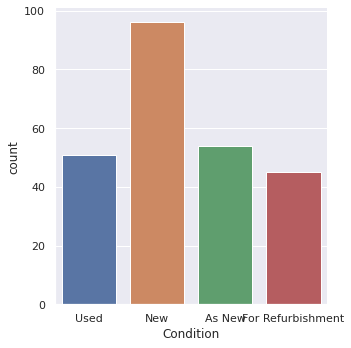

In [12]:
sn.set()
print(df['Condition'].value_counts())
sn.catplot(x="Condition", kind="count", data=df);

Homes                239
Single Habitation      7
Name: PropertyType, dtype: Int64


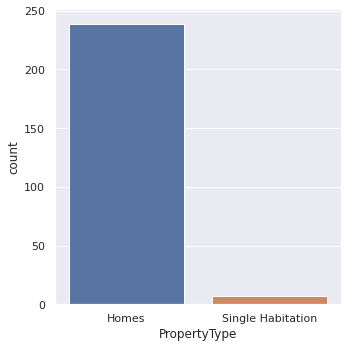

In [13]:
print(df['PropertyType'].value_counts())
sn.catplot(x="PropertyType", kind="count", data=df);

Apartment             226
Duplex                  9
Townhouse Dwelling      4
Dwelling                2
Studio                  2
Isolated Villa          1
Penthouse               1
Apart Hotel             1
Name: PropertySubType, dtype: Int64


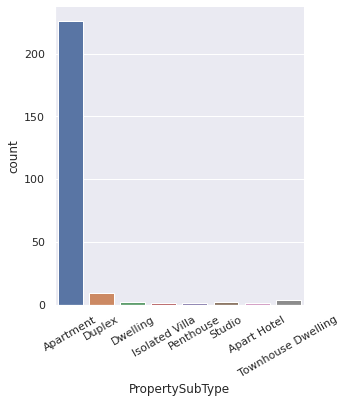

In [14]:
print(df['PropertySubType'].value_counts())
g = sn.catplot(x="PropertySubType", kind="count", data=df)
g.set_xticklabels(rotation=30)

Marvila                    51
Campo de Ourique           23
Estrela                    17
Santa Maria Maior          17
Arroios                    16
Sao Vicente                14
Penha de Franca            12
Olivais                    11
Belem                      11
Alvalade                    8
Avenidas Novas              8
Parque das Nacoes           8
Santo Antonio               8
Lumiar                      7
Campolide                   6
Sao Domingos de Benfica     6
Benfica                     5
Ajuda                       5
Misericordia                4
Alcantara                   3
Santa Clara                 2
Carnide                     2
Areeiro                     1
Beato                       1
Name: Parish, dtype: Int64


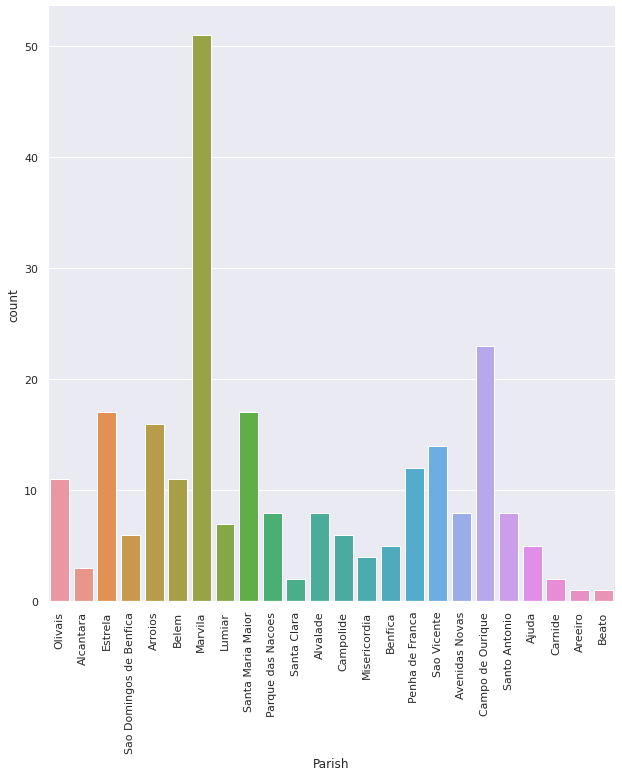

In [15]:
print(df['Parish'].value_counts())
g = sn.catplot(x="Parish", kind="count", data=df)
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(10,10)

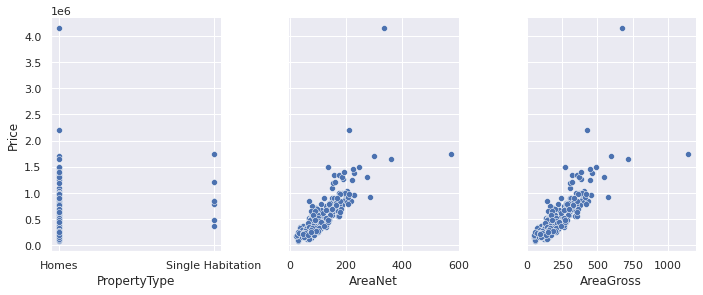

In [16]:
df_plot = df[["Price", "PropertyType", "AreaNet", 
                  "AreaGross"]]

g = sn.pairplot(data=df_plot, y_vars=['Price'], x_vars=df_plot.columns[1:4])
g.tight_layout()
g.fig.set_size_inches(10,5)

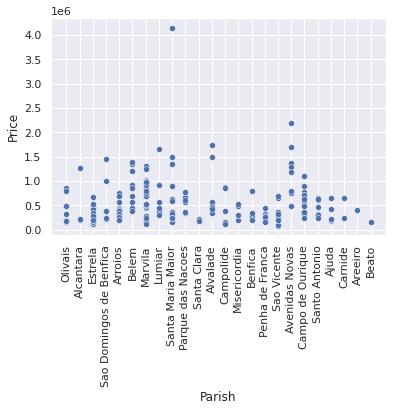

In [17]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Parish'], )
g.tick_params(axis='x', rotation=90)

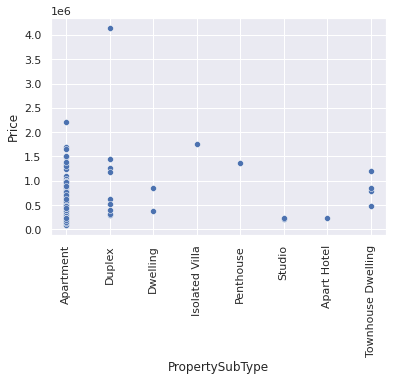

In [18]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['PropertySubType'], )
g.tick_params(axis='x', rotation=90)

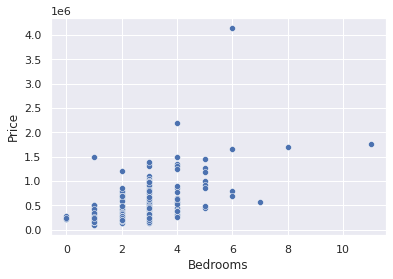

In [19]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Bedrooms'], )

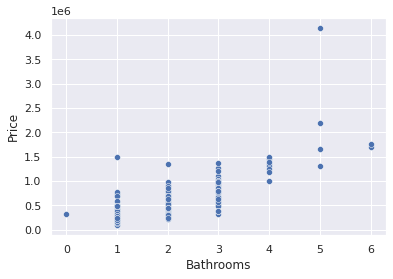

In [20]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Bathrooms'], )


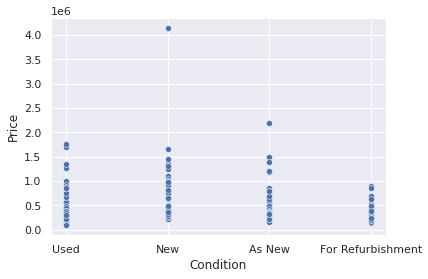

In [21]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Condition'] )

Skewness: 3.310139
Kurtosis: 21.700172


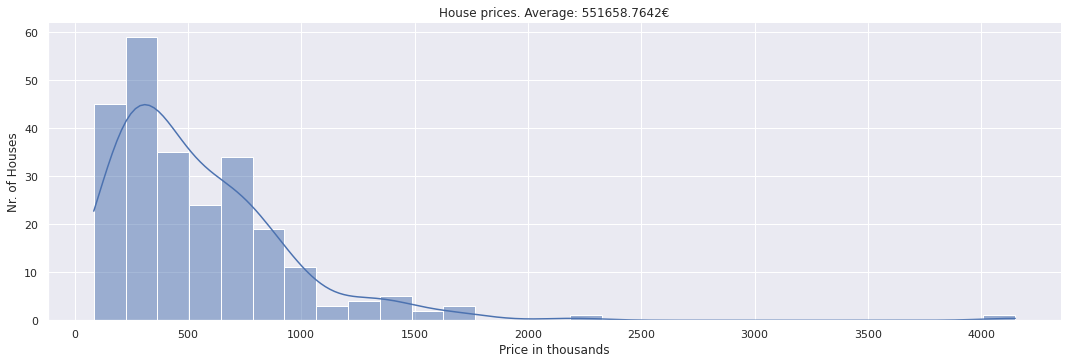

In [32]:
sn.displot(df['Price']/1e3, 
            aspect=3,
            kde=True)

plt.title(f'House prices. Average: {round(df.Price.mean(),4)}€')
plt.xlabel('Price in thousands')
plt.ylabel('Nr. of Houses')

print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

plt.show()

## Visualizing the Data - OpenStreetMap

### Creating a new column with categorical values
We're adding a new row to our dataframe with categorical values based on the price of the houses in order to better visuzalise the data first

In [23]:
def categorisePrices(row):
    if row['Price'] <= 2e5:
        return 'Low Price'
    elif row['Price'] > 2e5 and row['Price'] <= 4e5:
        return 'Below Average Price'
    elif row['Price'] > 4e5 and row['Price'] <=6e5:
        return 'Average Price'
    elif row['Price'] > 6e5 and row['Price'] < 1e6:
        return 'Above Average Price'
    elif row['Price'] >= 1e6:
        return 'High Price'
    
df['Price_Category'] = df.apply(lambda row: categorisePrices(row), axis=1)

df

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Olivais,2463,198000,Low Price
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Alcantara,3125,1270000,High Price
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Estrela,4005,140000,Low Price
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.164,Sao Domingos de Benfica,3412,995000,Above Average Price
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Arroios,3277,570000,Average Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,For Refurbishment,Homes,Apartment,2,1,66,132,0,38.746,-9.1769,Benfica,2727,196500,Low Price
242,347,For Refurbishment,Homes,Apartment,3,1,75,150,0,38.7177,-9.1341,Santa Maria Maior,4807,245000,Below Average Price
243,348,For Refurbishment,Single Habitation,Townhouse Dwelling,2,1,90,180,0,38.7694,-9.1138,Olivais,2463,486000,Average Price
244,349,For Refurbishment,Single Habitation,Dwelling,4,3,121,242,0,38.703,-9.2044,Belem,3542,375000,Below Average Price


In [24]:
from folium.plugins import FastMarkerCluster

loc_center = [df['Latitude'].mean(), df['Longitude'].mean()]

map1 = folium.Map(location = loc_center, tiles='Openstreetmap', zoom_start = 12.2, control_scale=True)

for index, loc in df.iterrows():
    
    if loc['Price_Category']=='Low Price':
        color = 'green'
    elif loc['Price_Category']=='Below Average Price':
        color = "yellow"
    elif loc['Price_Category']=='Average Price':
        color = 'blue'
    elif loc['Price_Category']=='Above Average Price' :
        color = 'orange'
    else:
        color = 'red'
    
    popup = ('Price: {}€\n Property Sub Type: {}\n Net Area: {} m²\n Category: {}'
                .format(loc['Price'], loc['PropertySubType'], loc['AreaNet'], loc['Price_Category']))
    
    folium.CircleMarker([loc['Latitude'], loc['Longitude']],
                        radius=5, weight=10, fill= False, popup=popup, color=color).add_to(map1)

FastMarkerCluster(data=list(zip(df['Latitude'].values, df['Longitude'].values))).add_to(map1) 
folium.LayerControl().add_to(map1)
map1

### Some outliers

The highest price house in the dataset:

In [25]:
df.get(df.Price == df.Price.max())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
144,249,New,Homes,Duplex,6,5,336,672,0,38.7116,-9.1303,Santa Maria Maior,4807,4150000,High Price


In [27]:
df.get(df.AreaNet == df.AreaNet.max())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
50,151,Used,Single Habitation,Isolated Villa,11,6,573,1146,0,38.7497,-9.1347,Alvalade,3623,1750000,High Price


In [28]:
df.get(df.AreaGross == df.AreaGross.max())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
50,151,Used,Single Habitation,Isolated Villa,11,6,573,1146,0,38.7497,-9.1347,Alvalade,3623,1750000,High Price


The lowest price house in the dataset:

In [119]:
df.get(df.Price == df.Price.min())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Log,Price_Category
37,138,Used,Homes,Apartment,1,1,29,58,0,38.7147,-9.1333,Sao Vicente,3402,85000,11.350407,Low Price


Analysing the given features of each of these outliers we can conclude that although they stand out from the rest of the data these values can be real and legitimate so we're keeping them on the dataframe.

# Feature Engineering

In [29]:
df.dtypes

Id                   Int64
Condition           string
PropertyType        string
PropertySubType     string
Bedrooms             Int64
Bathrooms            Int64
AreaNet              Int64
AreaGross            Int64
Parking              Int64
Latitude           Float64
Longitude          Float64
Parish              string
Price M2             Int64
Price                Int64
Price_Category      object
dtype: object

In [30]:
#encoding our important categorical columns...
from sklearn.preprocessing import LabelEncoder

categorical_cols = ('Condition', 'PropertyType', 'PropertySubType', 'Parish')

labelencoder = LabelEncoder()

for c in categorical_cols:
    df[c+'_index'] = labelencoder.fit_transform(df[c])
df

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category,Condition_index,PropertyType_index,PropertySubType_index,Parish_index
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Olivais,2463,198000,Low Price,3,0,1,16
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Alcantara,3125,1270000,High Price,3,0,2,1
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Estrela,4005,140000,Low Price,3,0,1,12
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.164,Sao Domingos de Benfica,3412,995000,Above Average Price,3,0,1,22
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Arroios,3277,570000,Average Price,3,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,For Refurbishment,Homes,Apartment,2,1,66,132,0,38.746,-9.1769,Benfica,2727,196500,Low Price,1,0,1,8
242,347,For Refurbishment,Homes,Apartment,3,1,75,150,0,38.7177,-9.1341,Santa Maria Maior,4807,245000,Below Average Price,1,0,1,20
243,348,For Refurbishment,Single Habitation,Townhouse Dwelling,2,1,90,180,0,38.7694,-9.1138,Olivais,2463,486000,Average Price,1,1,7,16
244,349,For Refurbishment,Single Habitation,Dwelling,4,3,121,242,0,38.703,-9.2044,Belem,3542,375000,Below Average Price,1,1,3,7


In [31]:
corr= df.corr(method='pearson')
corr.style.background_gradient(cmap='Reds', axis=0)

,Id,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Price M2,Price,Condition_index,PropertyType_index,PropertySubType_index,Parish_index
Id,1.000000,0.014329,-0.020329,-0.061726,-0.061726,-0.219868,-0.044284,-0.010148,0.052801,-0.054303,-0.822686,0.125461,0.126328,0.007896
Bedrooms,0.014329,1.000000,0.672071,0.771292,0.771292,-0.111847,0.224300,-0.052104,-0.037470,0.541830,0.052188,0.263288,0.115980,-0.204767
Bathrooms,-0.020329,0.672071,1.000000,0.781154,0.781154,0.038160,0.154104,-0.068226,-0.011177,0.746716,-0.029170,0.191400,0.157038,-0.150446
AreaNet,-0.061726,0.771292,0.781154,1.000000,1.000000,-0.102283,0.277058,0.117813,-0.161325,0.798370,0.086044,0.238234,0.153355,-0.165127
AreaGross,-0.061726,0.771292,0.781154,1.000000,1.000000,-0.102283,0.277058,0.117813,-0.161325,0.798370,0.086044,0.238234,0.153355,-0.165127
Parking,-0.219868,-0.111847,0.038160,-0.102283,-0.102283,1.000000,-0.180040,-0.230680,0.147430,0.059220,0.106267,-0.052604,-0.069155,-0.177718
Latitude,-0.044284,0.224300,0.154104,0.277058,0.277058,-0.180040,1.000000,0.492685,-0.511346,0.054091,0.056566,0.039920,-0.031675,0.129109
Longitude,-0.010148,-0.052104,-0.068226,0.117813,0.117813,-0.230680,0.492685,1.000000,-0.217179,0.055152,0.107681,-0.141545,-0.112772,0.404130
Price M2,0.052801,-0.037470,-0.011177,-0.161325,-0.161325,0.147430,-0.511346,-0.217179,1.000000,0.039089,-0.117450,-0.103316,-0.073644,0.194951
Price,-0.054303,0.541830,0.746716,0.798370,0.798370,0.059220,0.054091,0.055152,0.039089,1.000000,0.028215,0.141583,0.162352,-0.104070


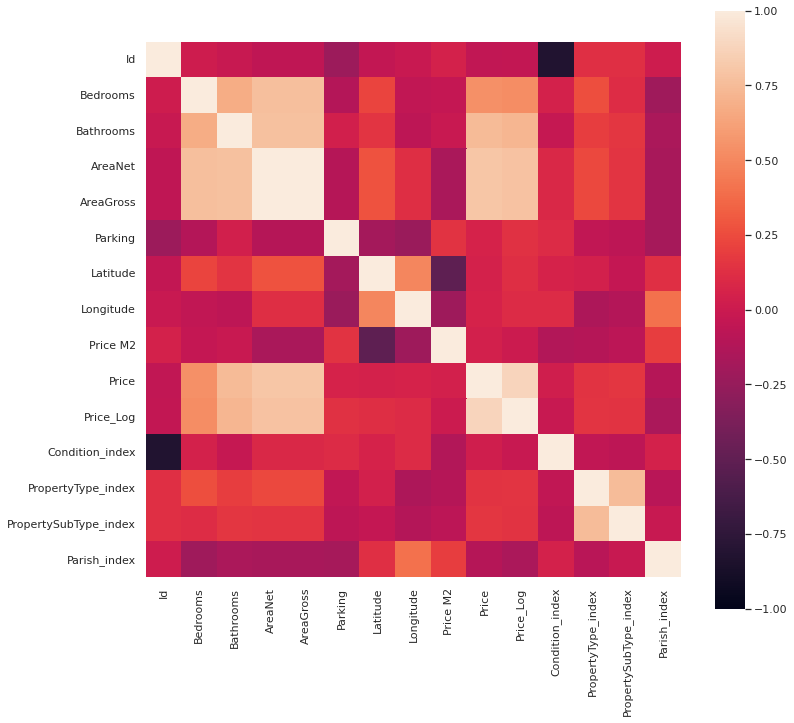

In [158]:
f, ax = plt.subplots(figsize=(12,11))
sn.heatmap(corr,square=True, vmax=1, vmin=-1)

## Feature selection

In [131]:
X = df[['Bedrooms', 'Bathrooms', 'AreaNet', 'AreaGross', 'Parking', 'Latitude','Longitude', 'Condition_index', 'PropertyType_index',
        'PropertySubType_index', 'Parish_index']]
Y = df[['Price']]


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [133]:
X_train

,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Condition_index,PropertyType_index,PropertySubType_index,Parish_index
110,1,1,79,158,0,38.7458,-9.0978,2,0,1,14
15,4,2,137,274,0,38.7463,-9.1439,3,0,1,2
144,6,5,336,672,0,38.7116,-9.1303,2,0,2,20
7,3,1,81,162,0,38.7561,-9.1796,3,0,1,22
205,6,2,150,300,0,38.7262,-9.135,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
67,1,1,50,100,0,38.7176,-9.1527,2,0,1,21
192,3,3,120,240,0,38.7624,-9.0983,0,0,2,17
117,2,1,139,278,0,38.7458,-9.0978,2,0,1,14
47,3,1,105,210,0,38.7491,-9.142,3,0,1,2


In [134]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
#show the scaled features
df_train = pd.DataFrame(X_train, columns = ['Bedrooms', 'Bathrooms', 'AreaNet', 'AreaGross','Parking', 'Latitude', 
                                            'Longitude', 'Condition_index', 'PropertyType_index',
                                            'PropertySubType_index', 'Parish_index'])
df_train

,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Condition_index,PropertyType_index,PropertySubType_index,Parish_index
0,-1.135069,-0.809040,-0.476051,-0.476051,-0.304855,0.580571,1.329126,0.372370,-0.161796,-0.211298,0.168516
1,1.053195,0.134840,0.401625,0.401625,-0.304855,0.604467,-0.135030,1.332693,-0.161796,-0.211298,-1.853674
2,2.512038,2.966479,3.412961,3.412961,-0.304855,-1.053903,0.296911,0.372370,-0.161796,1.006775,1.179610
3,0.323774,-0.809040,-0.445786,-0.445786,-0.304855,1.072825,-1.268878,1.332693,-0.161796,-0.211298,1.516642
4,2.512038,0.134840,0.598345,0.598345,-0.304855,-0.356145,0.147637,-0.587953,-0.161796,-0.211298,-1.516642
...,...,...,...,...,...,...,...,...,...,...,...
191,-1.135069,-0.809040,-0.914889,-0.914889,-0.304855,-0.767153,-0.414522,0.372370,-0.161796,-0.211298,1.348126
192,0.323774,1.078720,0.144375,0.144375,-0.304855,1.373912,1.313245,-1.548276,-0.161796,1.006775,0.674063
193,-0.405648,-0.809040,0.431889,0.431889,-0.304855,0.580571,1.329126,0.372370,-0.161796,-0.211298,0.168516
194,0.323774,-0.809040,-0.082610,-0.082610,-0.304855,0.738283,-0.074686,1.332693,-0.161796,-0.211298,-1.853674


# Prediction model and results

In [136]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0, max_features=None)
regressor.fit(X_train, Y_train)

/tmp/ipykernel_21757/2584206897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, Y_train)


RandomForestRegressor(max_features=None, n_estimators=200, random_state=0)

In [137]:
Y_pred = regressor.predict(X_test)

In [154]:
df_predictions = pd.DataFrame(Y_test, columns = ['Price'])
df_predictions['Prediction'] = Y_pred.tolist()
df_predictions

,Price,Prediction
89,810000,7.576420e+05
108,500000,4.810579e+05
74,598000,6.102300e+05
109,500000,4.810579e+05
71,365000,3.597900e+05
126,220000,3.351050e+05
104,920000,9.196898e+05
138,650000,7.788061e+05
154,400000,4.397600e+05
199,790000,1.080802e+06


### Evaluating Results

In [155]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score', metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error: 103974.80079780218
Mean Squared Error: 41764886155.337135
Root Mean Squared Error: 204364.59124647093
R2 Score 0.6297208421979152


In [182]:
def categorisePredictions(row):
    error = abs(row['Price'] - row['Prediction'])
    MAE = metrics.mean_absolute_error(Y_test, Y_pred)
    if error <= MAE*0.5:
        return 'Good Prediction'
    elif error <= MAE or error >= MAE*1.5:
        return 'Average Prediction'
    else:
        return 'Bad prediction'
    
df_predictions['Prediction_Category'] = df_predictions.apply(lambda row: categorisePredictions(row), axis=1)

In [183]:
df_predictions

,Price,Prediction,Prediction_Category
89,810000,7.576420e+05,Average Prediction
108,500000,4.810579e+05,Good Prediction
74,598000,6.102300e+05,Good Prediction
109,500000,4.810579e+05,Good Prediction
71,365000,3.597900e+05,Good Prediction
126,220000,3.351050e+05,Bad prediction
104,920000,9.196898e+05,Good Prediction
138,650000,7.788061e+05,Bad prediction
154,400000,4.397600e+05,Good Prediction
199,790000,1.080802e+06,Average Prediction


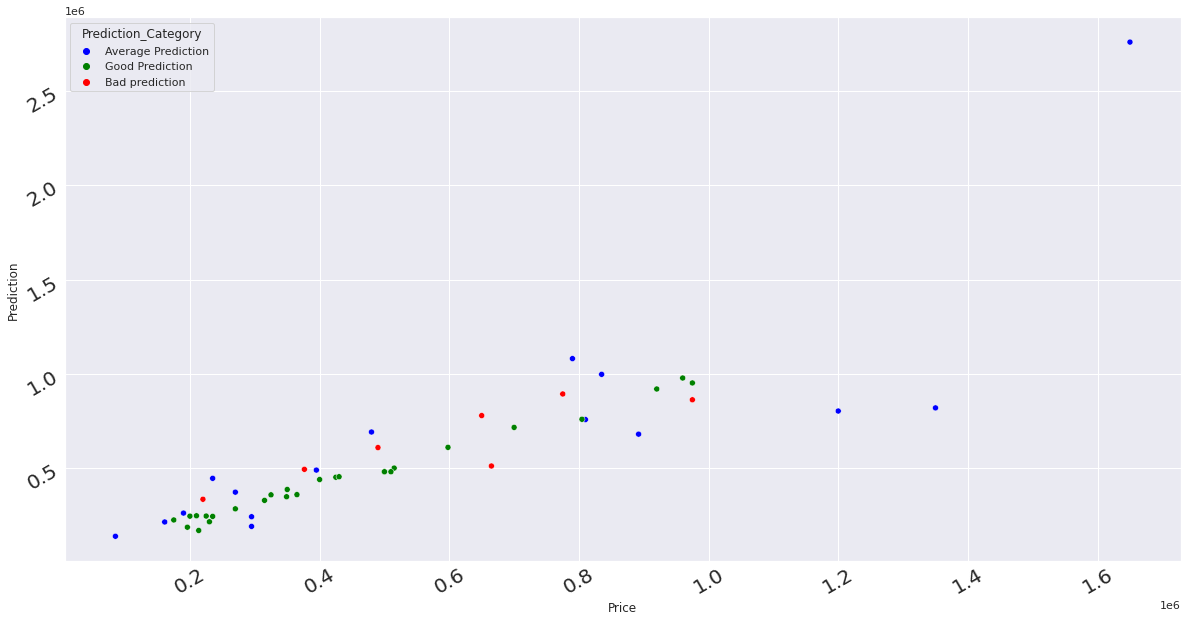

In [184]:
# set the dimensions for the scatterplot
fig, ax = plt.subplots(figsize=(20,10))
sn.scatterplot(hue="Prediction_Category", y="Prediction", x="Price", data=df_predictions)
sn.set_palette(["blue", "green","red"])

# plot formatting 
ax.tick_params(axis="x", rotation=30, labelsize=20, length=0)
ax.tick_params(axis="y", rotation=30, labelsize=20, length=0)

# Thoughts and Conclusions